
# Project: Logistic Regression for Predicting Intelligence

### Research Question:  Can brain size and body size predict intelligence?

This notebook analyzes the relationship between Performance IQ scores (PIQ) and potential predictors:
- Brain size (x1): Count from MRI scans (count/10,000).
- Height (x2): Height in inches.
- Weight (x3): Weight in pounds.

### Content:
- Correlation Analysis
- Predictor Selection
- Model Building and Evaluation

In [1]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [3]:
iq_data_url = "https://drive.google.com/file/d/12exhA6rYPHwanHidmlKVjM1r6-9YrIMY/view?usp=sharing"
iq_data_url2 ='https://drive.google.com/uc?id=' + iq_data_url.split('/')[-2]

df_iq = pd.read_csv(iq_data_url2, sep = "\t")
df_iq.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


In [5]:
df_iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PIQ     38 non-null     int64  
 1   Brain   38 non-null     float64
 2   Height  38 non-null     float64
 3   Weight  38 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


In [12]:
# read txt file
df = pd.read_csv("iqsize.txt", delimiter ="\t", header = 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PIQ     38 non-null     int64  
 1   Brain   38 non-null     float64
 2   Height  38 non-null     float64
 3   Weight  38 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


## 1. Correlation Matrix

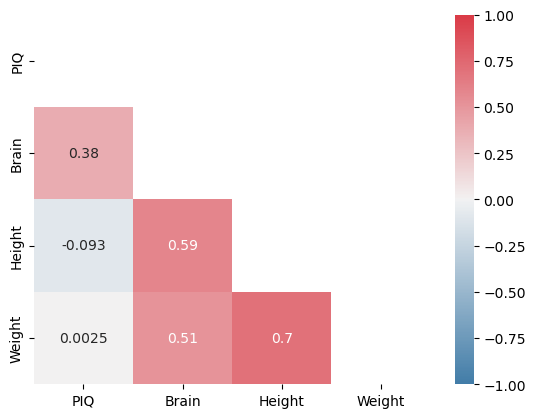

In [14]:
# calculate the correlation matrix 0: no correlation -1:negative correlation  1: positive correlation
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))  # The mask is created to hide the upper triangle of the heatmap.

cmap = sns.diverging_palette(240, 10, as_cmap=True) # defines a diverging color palette for the heatmap.

sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,  # set the range of color bar  from -1 to 1
    vmax = 1,
    cmap = cmap,
    annot = True  #adds correlation coefficients as text on the graph
);

Insights: 
- IQ & W/H/B 
   - IQ & W = 0.0025 no strong correlation
   - IQ & H = -0.093 negative but still weak correlation
   - IQ & B = 0.38   have some certain positive correlation, but not strong
- Between preditor variables
   - W & H = 0.7     strong and positive correlation
   - W & B = 0.59    medorate and positive correlation
   - H & B = 0.51    medorate and positive correlation

For multiple regression model, we need to avoid **Multicollinearity**, 
- in this case, weight and height highly correlated.
- careful selection of predictors: brain and height




**Multicollinearity**
   - A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. 
   - The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. (The idea is that you can change the value of one independent variable and not the others.when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable.)

   **How to fix Multicollinearity or when do we have to fix it?**
   - The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
   - Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. 
   - Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity. 
https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/




<Axes: xlabel='PIQ', ylabel='Count'>

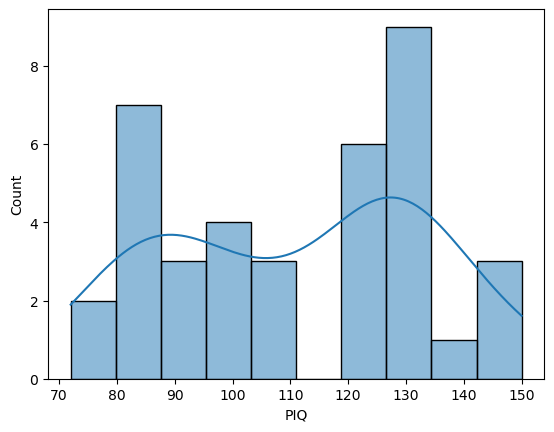

In [36]:
# Check data distribution

sns.histplot(data = df['PIQ'],bins =10, kde=True)

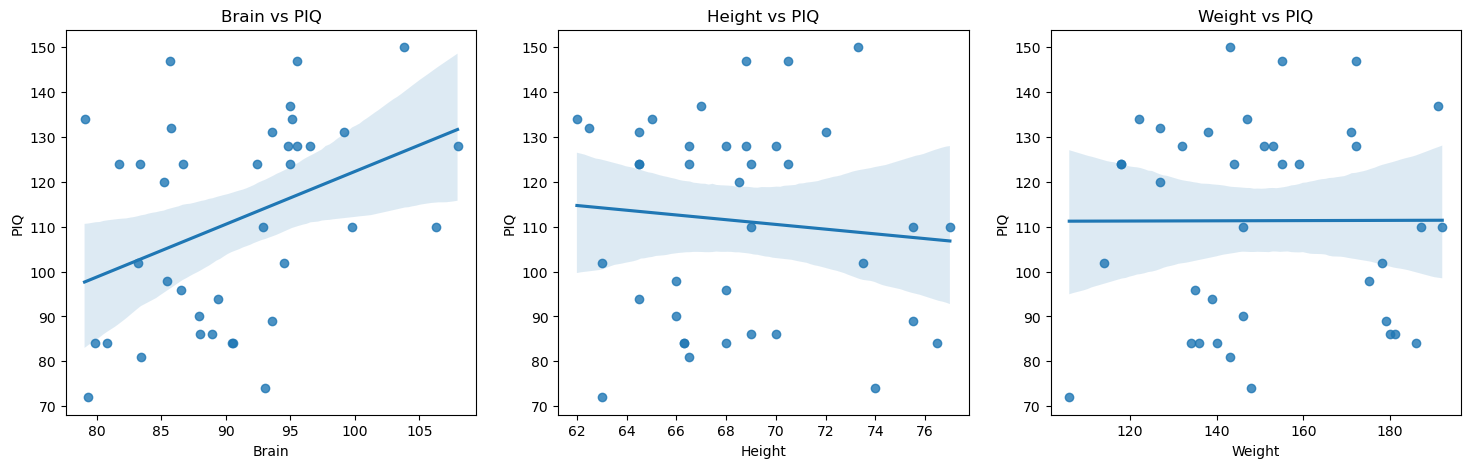

In [19]:

# IQ & W/H/B show the results of a linear regression for each preditor variable

#  Create a figure with 1 row and 3 columns (put three plots together)
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

sns.regplot(data=df, x="Brain", y= "PIQ", ci = 95, ax=axes[0])
axes[0].set_title("Brain vs PIQ")

sns.regplot(data=df, x="Height", y= "PIQ", ci = 95, ax=axes[1] )
axes[1].set_title("Height vs PIQ")

sns.regplot(data=df, x="Weight", y= "PIQ", ci = 95, ax=axes[2] )
axes[2].set_title("Weight vs PIQ")

plt.show()

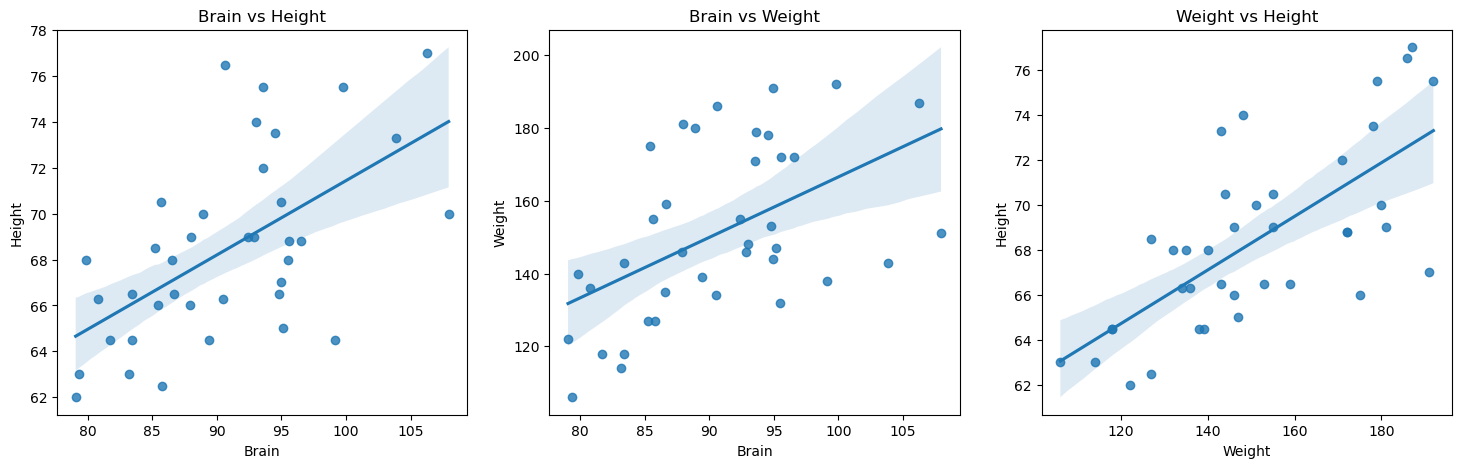

In [20]:
# Between preditor variables

fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

sns.regplot(data=df, x="Brain", y= "Height", ci = 95, ax=axes[0])
axes[0].set_title("Brain vs Height")

sns.regplot(data=df, x="Brain", y= "Weight", ci = 95, ax=axes[1] )
axes[1].set_title("Brain vs Weight")

sns.regplot(data=df, x="Weight", y= "Height", ci = 95, ax=axes[2] )
axes[2].set_title("Weight vs Height")

plt.show()

## 2.  What appears to be a good predictor?

Brain and Height

- multicolinearility affects the coefficents and p-values, we can see strong correlation betwee W and H
- IQ and W, have no correlation 
- so to avoid unbaised coefficients and p-values, i would not select weight

## 3. Model Building and Evaluation

In [26]:
####################################
#            Model 1               #   
#  IQ = constant + Brain + Height  #
####################################

# Select predictor variables : brain & H
X = df[
    [
        'Brain', 'Height'
    ]
]

# select the dependent variable
y = df['PIQ']

# Add a constant 
X = sm.add_constant(X)

# Fit the OLS 
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     7.321
Date:                Wed, 04 Sep 2024   Prob (F-statistic):            0.00221
Time:                        15:56:29   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             336.5
Df Residuals:                      35   BIC:                             341.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.2757     55.867      1.992      0.0

In [27]:
####################################
#            Model 2               #   
#    IQ =  Brain + Height          #
####################################

## do not consider the constant


# Select predictor variables : brain & H
X = df[
    [
        'Brain', 'Height'
    ]
]

# select the dependent variable
y = df['PIQ']

# Add a constant 
#X = sm.add_constant(X)

# Fit the OLS 
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIQ   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              576.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    4.55e-28
Time:                        15:57:48   Log-Likelihood:                         -167.29
No. Observations:                  38   AIC:                                      338.6
Df Residuals:                      36   BIC:                                      341.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Uncentered R2: 

- (without a constant) can be misleading, especially if the data is far from the origin (0,0), 

- It is better to include a constant, let the model tell whether it is significant.

In [28]:
################################################
#               Model 3                        #   
#    IQ =  constant + Brain + Height + Weight  #
################################################

# Select predictor variables : brain & H
X = df[
    [
        'Brain', 'Height','Weight'
    ]
]

# select the dependent variable
y = df['PIQ']

# Add a constant 
X = sm.add_constant(X)

# Fit the OLS 
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Wed, 04 Sep 2024   Prob (F-statistic):            0.00722
Time:                        16:09:53   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3536     62.971      1.768      0.0

In [30]:
#######################################
#               Model 3               #   
#    IQ =  constant + Brain           #
#######################################

# Select predictor variables : brain & H
X = df[
    [
        'Brain'
    ]
]

# select the dependent variable
y = df['PIQ']

# Add a constant 
X = sm.add_constant(X)

# Fit the OLS 
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     5.994
Date:                Wed, 04 Sep 2024   Prob (F-statistic):             0.0194
Time:                        16:47:31   Log-Likelihood:                -168.97
No. Observations:                  38   AIC:                             341.9
Df Residuals:                      36   BIC:                             345.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6519     43.712      0.106      0.9

In [38]:
############################
#                          #   
#  IQ = constant + Brain   #
############################

# Select predictor variables : brain & H
X = df[
    [
        'Brain'
    ]
]

# select the dependent variable
y = df['PIQ']

# Add a constant 
X = sm.add_constant(X)

# Fit the OLS 
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     5.994
Date:                Wed, 04 Sep 2024   Prob (F-statistic):             0.0194
Time:                        22:13:49   Log-Likelihood:                -168.97
No. Observations:                  38   AIC:                             341.9
Df Residuals:                      36   BIC:                             345.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6519     43.712      0.106      0.9

In [29]:
####################################
#           Best model             #
#            Model 1               #   
#  IQ = constant + Brain + Height  #
####################################

# Select predictor variables : brain & H
X = df[
    [
        'Brain', 'Height'
    ]
]

# select the dependent variable
y = df['PIQ']

# Add a constant 
X = sm.add_constant(X)

# Fit the OLS 
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     7.321
Date:                Wed, 04 Sep 2024   Prob (F-statistic):            0.00221
Time:                        16:11:59   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             336.5
Df Residuals:                      35   BIC:                             341.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.2757     55.867      1.992      0.0

**(d) Write down the model equation.**

In [23]:
# Y = constant + Beta_brain * X_brain + Beta_height * X_height + error

**(e) Interpret the model output.**

- R-square (or adj. R-square) = 0.295: bad model fit --- bad prediction;
- const:  P:not 95% statistically significant； but 90% 
- Brain:  P:highly significant； significantly different from 0; larger brain sizes, higher IQ
- Height: P:highly significant； significantly different from 0; Taller, smarter.



**BUT** this is about correlations, not causiliity. it is not about big brain sizes cause higher IQ.

It is more like an observation.
